# Logistic Regression

## Jorge Alberto Padilla Gutierrez

# Imports

In [173]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Feature Engineering

In [174]:
# Let's first visualize the data as it is
data = pd.read_csv('../data/external/titanic.csv')
data['Cabin'] = data['Cabin'].fillna('')
data['Age'] = data['Age'].fillna(0.0)
data['Fare'] = data['Fare'].fillna(0.0)
X = np.array(data.drop('Survived', axis=1))
y = np.array(data['Survived'])

Text(0, 0.5, 'Survived')

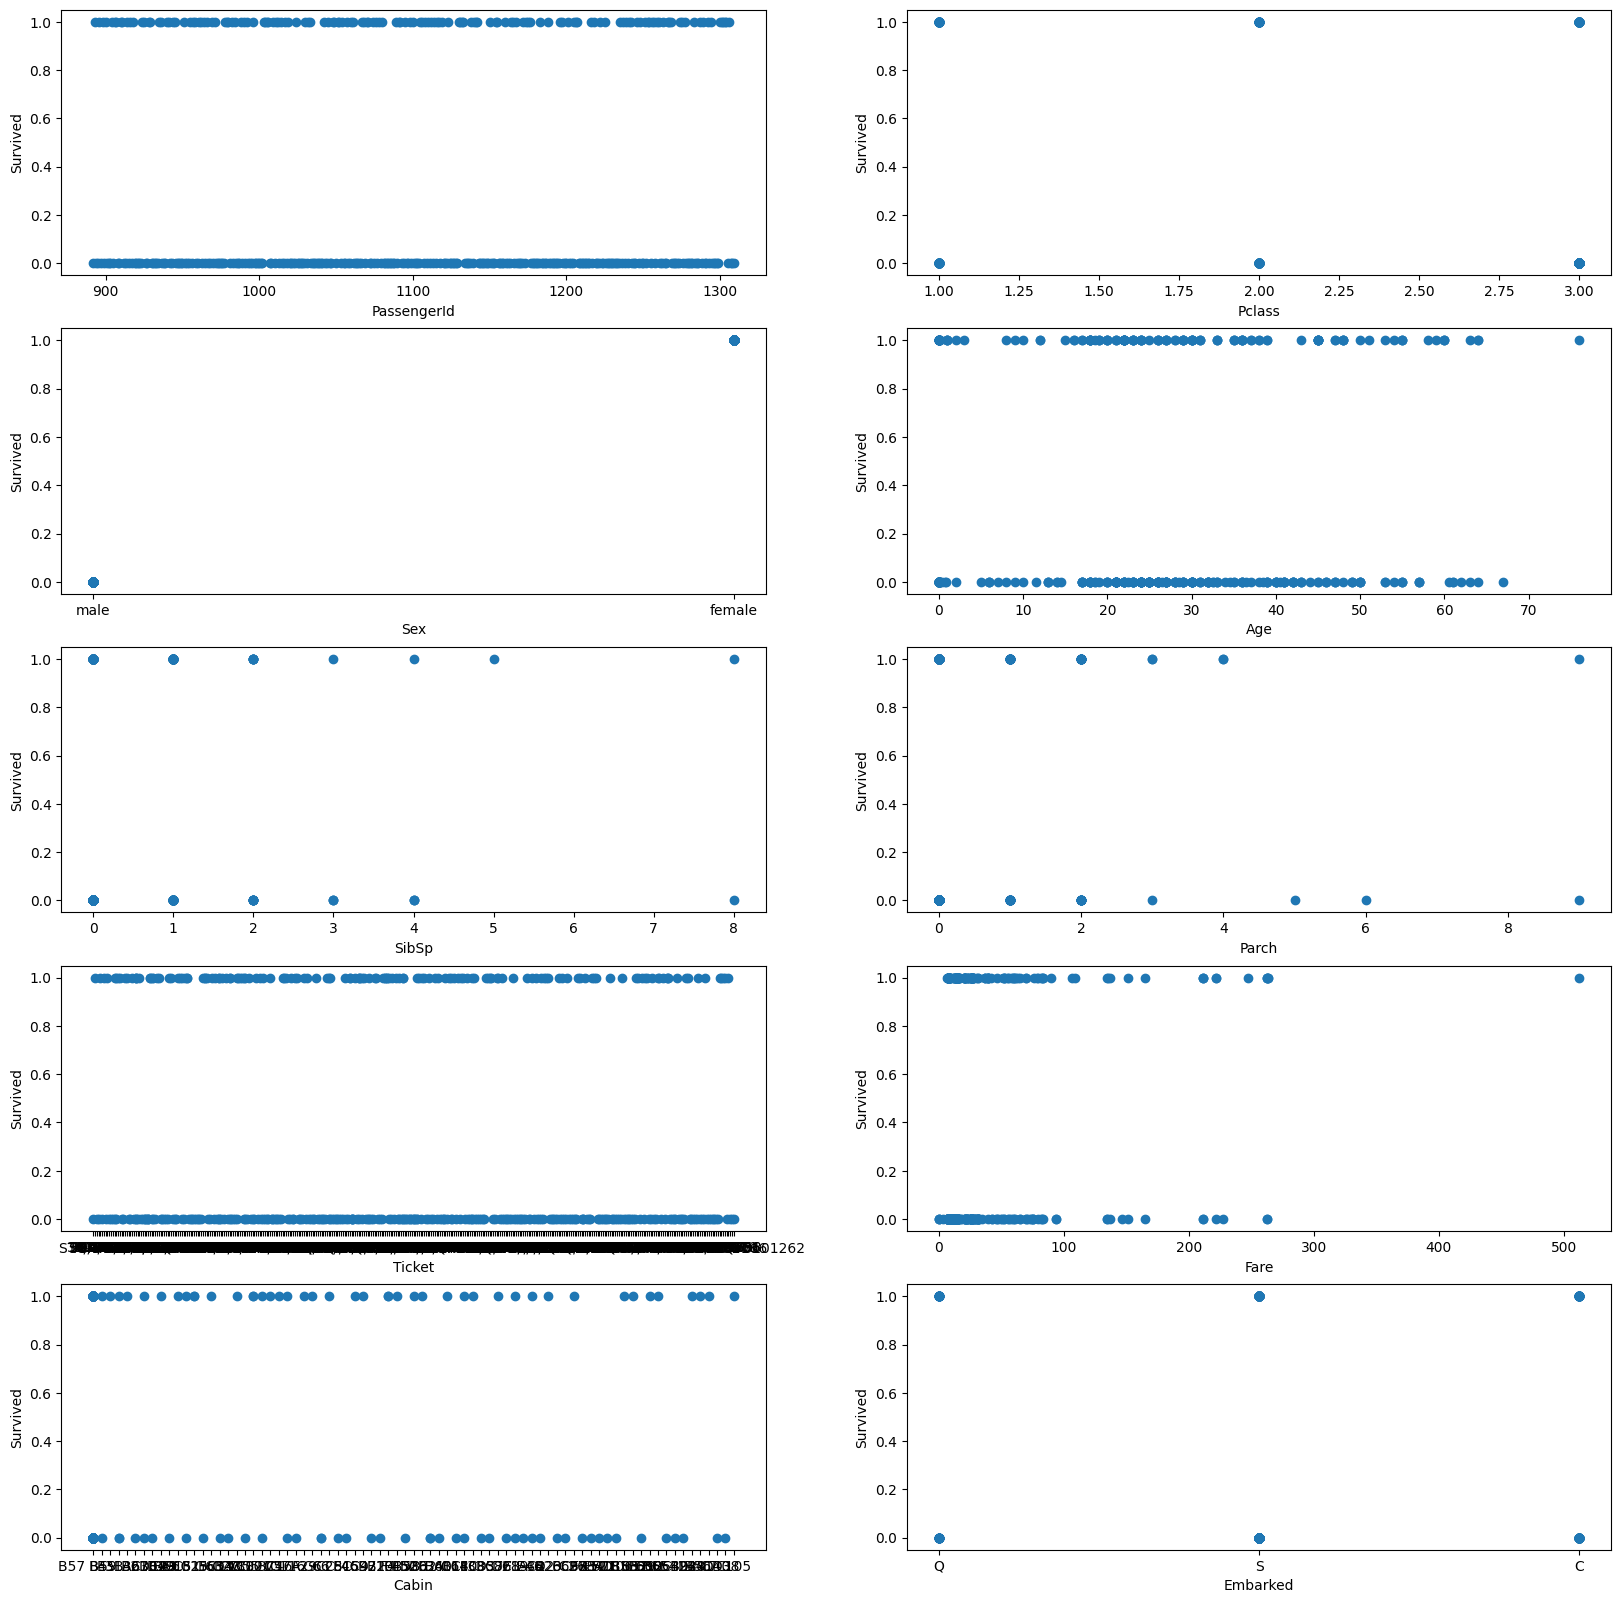

In [175]:
plt.figure(figsize=(20,20))
plt.subplot(5,2,1)
plt.scatter(X[:,0],y)
plt.xlabel('PassengerId')
plt.ylabel('Survived')
plt.subplot(5,2,2)
plt.scatter(X[:,1],y)
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.subplot(5,2,3)
plt.scatter(X[:,3],y)
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.subplot(5,2,4)
plt.scatter(X[:,4],y)
plt.xlabel('Age')
plt.ylabel('Survived')
plt.subplot(5,2,5)
plt.scatter(X[:,5],y)
plt.xlabel('SibSp')
plt.ylabel('Survived')
plt.subplot(5,2,6)
plt.scatter(X[:,6],y)
plt.xlabel('Parch')
plt.ylabel('Survived')
plt.subplot(5,2,7)
plt.scatter(X[:,7],y)
plt.xlabel('Ticket')
plt.ylabel('Survived')
plt.subplot(5,2,8)
plt.scatter(X[:,8],y)
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.subplot(5,2,9)
plt.scatter(X[:,9],y)
plt.xlabel('Cabin')
plt.ylabel('Survived')
plt.subplot(5,2,10)
plt.scatter(X[:,10],y)
plt.xlabel('Embarked')
plt.ylabel('Survived')

## PassengerId
This is the identifier, this should not have relevance

## Pclass
The values are good as they are

## Name
This is also an identifier, this is redundant

In [176]:
data = data.drop(['Name'], axis=1)
print(data)

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            892         0       3    male  34.5      0      0   
1            893         1       3  female  47.0      1      0   
2            894         0       2    male  62.0      0      0   
3            895         0       3    male  27.0      0      0   
4            896         1       3  female  22.0      1      1   
..           ...       ...     ...     ...   ...    ...    ...   
413         1305         0       3    male   0.0      0      0   
414         1306         1       1  female  39.0      0      0   
415         1307         0       3    male  38.5      0      0   
416         1308         0       3    male   0.0      0      0   
417         1309         0       3    male   0.0      1      1   

                 Ticket      Fare Cabin Embarked  
0                330911    7.8292              Q  
1                363272    7.0000              S  
2                240276    9.6875              Q  
3  

## Sex

In [177]:
data = pd.concat([data,pd.get_dummies(data['Sex'])], axis=1)
data['male'] = data['male'].astype(int)
data['female'] = data['female'].astype(int)
data = data.drop(['Sex'], axis=1)
print(data)

     PassengerId  Survived  Pclass   Age  SibSp  Parch              Ticket  \
0            892         0       3  34.5      0      0              330911   
1            893         1       3  47.0      1      0              363272   
2            894         0       2  62.0      0      0              240276   
3            895         0       3  27.0      0      0              315154   
4            896         1       3  22.0      1      1             3101298   
..           ...       ...     ...   ...    ...    ...                 ...   
413         1305         0       3   0.0      0      0           A.5. 3236   
414         1306         1       1  39.0      0      0            PC 17758   
415         1307         0       3  38.5      0      0  SOTON/O.Q. 3101262   
416         1308         0       3   0.0      0      0              359309   
417         1309         0       3   0.0      1      1                2668   

         Fare Cabin Embarked  female  male  
0      7.8292     

## Age
We will round to nearest int

In [178]:
data['Age'] = data['Age'].fillna(0.0)
data['Age'] = data['Age'].astype(int)
print(data)

     PassengerId  Survived  Pclass  Age  SibSp  Parch              Ticket  \
0            892         0       3   34      0      0              330911   
1            893         1       3   47      1      0              363272   
2            894         0       2   62      0      0              240276   
3            895         0       3   27      0      0              315154   
4            896         1       3   22      1      1             3101298   
..           ...       ...     ...  ...    ...    ...                 ...   
413         1305         0       3    0      0      0           A.5. 3236   
414         1306         1       1   39      0      0            PC 17758   
415         1307         0       3   38      0      0  SOTON/O.Q. 3101262   
416         1308         0       3    0      0      0              359309   
417         1309         0       3    0      1      1                2668   

         Fare Cabin Embarked  female  male  
0      7.8292              Q  

## SibSP

Numbers of Siblings & Spouses are good as they are

## Parch

Number of Parents and Children are good as they are

## Ticket

Almost unique, not relevant

In [179]:
data = data.drop(['Ticket'], axis=1)
print(data)

     PassengerId  Survived  Pclass  Age  SibSp  Parch      Fare Cabin  \
0            892         0       3   34      0      0    7.8292         
1            893         1       3   47      1      0    7.0000         
2            894         0       2   62      0      0    9.6875         
3            895         0       3   27      0      0    8.6625         
4            896         1       3   22      1      1   12.2875         
..           ...       ...     ...  ...    ...    ...       ...   ...   
413         1305         0       3    0      0      0    8.0500         
414         1306         1       1   39      0      0  108.9000  C105   
415         1307         0       3   38      0      0    7.2500         
416         1308         0       3    0      0      0    8.0500         
417         1309         0       3    0      1      1   22.3583         

    Embarked  female  male  
0          Q       0     1  
1          S       1     0  
2          Q       0     1  
3      

## Fare

We will round to nearest int

In [180]:
data['Fare'] = data['Fare'].fillna(0.0)
data['Fare'] = data['Fare'].astype(int)
print(data)

     PassengerId  Survived  Pclass  Age  SibSp  Parch  Fare Cabin Embarked  \
0            892         0       3   34      0      0     7              Q   
1            893         1       3   47      1      0     7              S   
2            894         0       2   62      0      0     9              Q   
3            895         0       3   27      0      0     8              S   
4            896         1       3   22      1      1    12              S   
..           ...       ...     ...  ...    ...    ...   ...   ...      ...   
413         1305         0       3    0      0      0     8              S   
414         1306         1       1   39      0      0   108  C105        C   
415         1307         0       3   38      0      0     7              S   
416         1308         0       3    0      0      0     8              S   
417         1309         0       3    0      1      1    22              C   

     female  male  
0         0     1  
1         1     0  
2  

## Cabin

We will merge by the letter of the cabin

In [181]:
data['Cabin'] = data['Cabin'].fillna('')
data['Cabin'] = data['Cabin'].str[0]
data['Cabin'] = data['Cabin'].fillna('O')
data = pd.concat([data,pd.get_dummies(data['Cabin'])], axis=1)
data['A'] = data['A'].astype(int)
data['B'] = data['B'].astype(int)
data['C'] = data['C'].astype(int)
data['D'] = data['D'].astype(int)
data['E'] = data['E'].astype(int)
data['F'] = data['F'].astype(int)
data['G'] = data['G'].astype(int)
data['O'] = data['O'].astype(int)
data = data.drop(['Cabin'], axis=1)
print(data)

     PassengerId  Survived  Pclass  Age  SibSp  Parch  Fare Embarked  female  \
0            892         0       3   34      0      0     7        Q       0   
1            893         1       3   47      1      0     7        S       1   
2            894         0       2   62      0      0     9        Q       0   
3            895         0       3   27      0      0     8        S       0   
4            896         1       3   22      1      1    12        S       1   
..           ...       ...     ...  ...    ...    ...   ...      ...     ...   
413         1305         0       3    0      0      0     8        S       0   
414         1306         1       1   39      0      0   108        C       1   
415         1307         0       3   38      0      0     7        S       0   
416         1308         0       3    0      0      0     8        S       0   
417         1309         0       3    0      1      1    22        C       0   

     male  A  B  C  D  E  F  G  O  
0  

## Embarqued
We will make bins

In [182]:
data['Embarked'] = data['Embarked'].replace('C', 'Cherbourg')
data['Embarked'] = data['Embarked'].replace('Q', 'Queenstown')
data['Embarked'] = data['Embarked'].replace('S', 'Southampton')
data = pd.concat([data,pd.get_dummies(data['Embarked'])], axis=1)
data['Cherbourg'] = data['Cherbourg'].astype(int)
data['Queenstown'] = data['Queenstown'].astype(int)
data['Southampton'] = data['Southampton'].astype(int)
data = data.drop(['Embarked'], axis=1)
print(data)

     PassengerId  Survived  Pclass  Age  SibSp  Parch  Fare  female  male  A  \
0            892         0       3   34      0      0     7       0     1  0   
1            893         1       3   47      1      0     7       1     0  0   
2            894         0       2   62      0      0     9       0     1  0   
3            895         0       3   27      0      0     8       0     1  0   
4            896         1       3   22      1      1    12       1     0  0   
..           ...       ...     ...  ...    ...    ...   ...     ...   ... ..   
413         1305         0       3    0      0      0     8       0     1  0   
414         1306         1       1   39      0      0   108       1     0  0   
415         1307         0       3   38      0      0     7       0     1  0   
416         1308         0       3    0      0      0     8       0     1  0   
417         1309         0       3    0      1      1    22       0     1  0   

     B  C  D  E  F  G  O  Cherbourg  Qu

In [183]:
X = np.array(data.drop(['Survived','PassengerId'], axis=1))
y = np.array(data['Survived'])

print(X)
print(y)
print(X.shape)
print(y.shape)

[[ 3 34  0 ...  0  1  0]
 [ 3 47  1 ...  0  0  1]
 [ 2 62  0 ...  0  1  0]
 ...
 [ 3 38  0 ...  0  0  1]
 [ 3  0  0 ...  0  0  1]
 [ 3  0  1 ...  1  0  0]]
[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 

Text(0, 0.5, 'Survived')

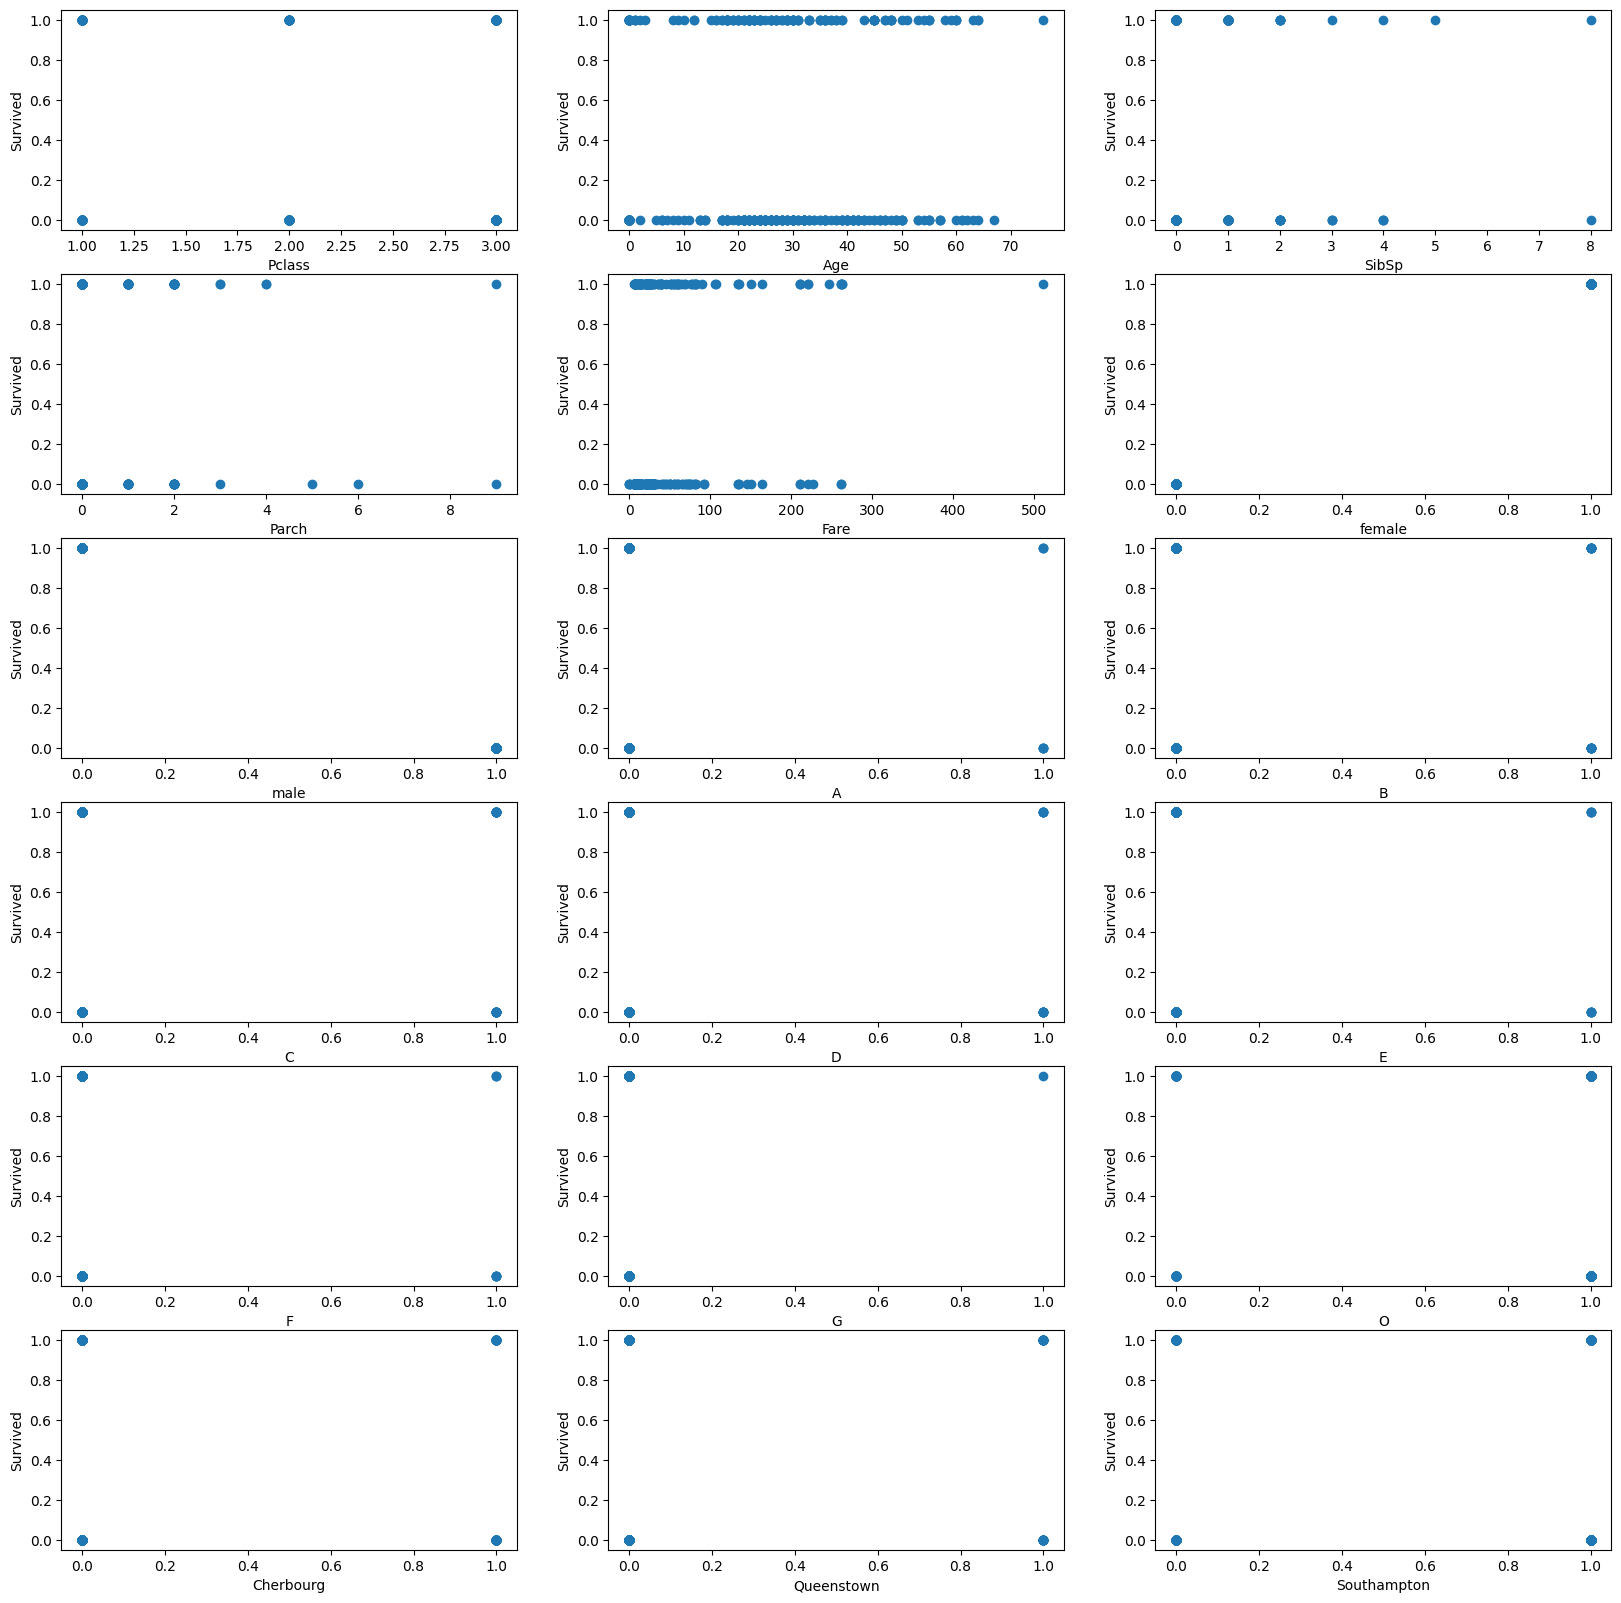

In [184]:
plt.figure(figsize=(20,20))
plt.subplot(6,3,1)
plt.scatter(X[:,0],y)
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.subplot(6,3,2)
plt.scatter(X[:,1],y)
plt.xlabel('Age')
plt.ylabel('Survived')
plt.subplot(6,3,3)
plt.scatter(X[:,2],y)
plt.xlabel('SibSp')
plt.ylabel('Survived')
plt.subplot(6,3,4)
plt.scatter(X[:,3],y)
plt.xlabel('Parch')
plt.ylabel('Survived')
plt.subplot(6,3,5)
plt.scatter(X[:,4],y)
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.subplot(6,3,6)
plt.scatter(X[:,5],y)
plt.xlabel('female')
plt.ylabel('Survived')
plt.subplot(6,3,7)
plt.scatter(X[:,6],y)
plt.xlabel('male')
plt.ylabel('Survived')
plt.subplot(6,3,8)
plt.scatter(X[:,7],y)
plt.xlabel('A')
plt.ylabel('Survived')
plt.subplot(6,3,9)
plt.scatter(X[:,8],y)
plt.xlabel('B')
plt.ylabel('Survived')
plt.subplot(6,3,10)
plt.scatter(X[:,9],y)
plt.xlabel('C')
plt.ylabel('Survived')
plt.subplot(6,3,11)
plt.scatter(X[:,10],y)
plt.xlabel('D')
plt.ylabel('Survived')
plt.subplot(6,3,12)
plt.scatter(X[:,11],y)
plt.xlabel('E')
plt.ylabel('Survived')
plt.subplot(6,3,13)
plt.scatter(X[:,12],y)
plt.xlabel('F')
plt.ylabel('Survived')
plt.subplot(6,3,14)
plt.scatter(X[:,13],y)
plt.xlabel('G')
plt.ylabel('Survived')
plt.subplot(6,3,15)
plt.scatter(X[:,14],y)
plt.xlabel('O')
plt.ylabel('Survived')
plt.subplot(6,3,16)
plt.scatter(X[:,15],y)
plt.xlabel('Cherbourg')
plt.ylabel('Survived')
plt.subplot(6,3,17)
plt.scatter(X[:,16],y)
plt.xlabel('Queenstown')
plt.ylabel('Survived')
plt.subplot(6,3,18)
plt.scatter(X[:,17],y)
plt.xlabel('Southampton')
plt.ylabel('Survived')

# Feature Scaling

## Pclass
Will move from [1,3] to [0,1]

In [185]:
standard = StandardScaler()
minmax = MinMaxScaler()

data['Pclass'] = pd.DataFrame(minmax.fit_transform((data['Pclass'].to_numpy()).reshape(-1,1)))
print(data)


     PassengerId  Survived  Pclass  Age  SibSp  Parch  Fare  female  male  A  \
0            892         0     1.0   34      0      0     7       0     1  0   
1            893         1     1.0   47      1      0     7       1     0  0   
2            894         0     0.5   62      0      0     9       0     1  0   
3            895         0     1.0   27      0      0     8       0     1  0   
4            896         1     1.0   22      1      1    12       1     0  0   
..           ...       ...     ...  ...    ...    ...   ...     ...   ... ..   
413         1305         0     1.0    0      0      0     8       0     1  0   
414         1306         1     0.0   39      0      0   108       1     0  0   
415         1307         0     1.0   38      0      0     7       0     1  0   
416         1308         0     1.0    0      0      0     8       0     1  0   
417         1309         0     1.0    0      1      1    22       0     1  0   

     B  C  D  E  F  G  O  Cherbourg  Qu

## Age
No scale needed

## SibSp
No scale needed

## Parch
No scale needed

## Fare
Will standarize

In [186]:
data['Fare'] = pd.DataFrame(standard.fit_transform((data['Fare'].to_numpy()).reshape(-1,1)))
print(data)

     PassengerId  Survived  Pclass  Age  SibSp  Parch      Fare  female  male  \
0            892         0     1.0   34      0      0 -0.503540       0     1   
1            893         1     1.0   47      1      0 -0.503540       1     0   
2            894         0     0.5   62      0      0 -0.467701       0     1   
3            895         0     1.0   27      0      0 -0.485620       0     1   
4            896         1     1.0   22      1      1 -0.413943       1     0   
..           ...       ...     ...  ...    ...    ...       ...     ...   ...   
413         1305         0     1.0    0      0      0 -0.485620       0     1   
414         1306         1     0.0   39      0      0  1.306305       1     0   
415         1307         0     1.0   38      0      0 -0.503540       0     1   
416         1308         0     1.0    0      0      0 -0.485620       0     1   
417         1309         0     1.0    0      1      1 -0.234751       0     1   

     A  B  C  D  E  F  G  O

## After Feature Engineering
No scale needed

[[ 1.  34.   0.  ...  0.   1.   0. ]
 [ 1.  47.   1.  ...  0.   0.   1. ]
 [ 0.5 62.   0.  ...  0.   1.   0. ]
 ...
 [ 1.  38.   0.  ...  0.   0.   1. ]
 [ 1.   0.   0.  ...  0.   0.   1. ]
 [ 1.   0.   1.  ...  1.   0.   0. ]]
[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0

Text(0, 0.5, 'Survived')

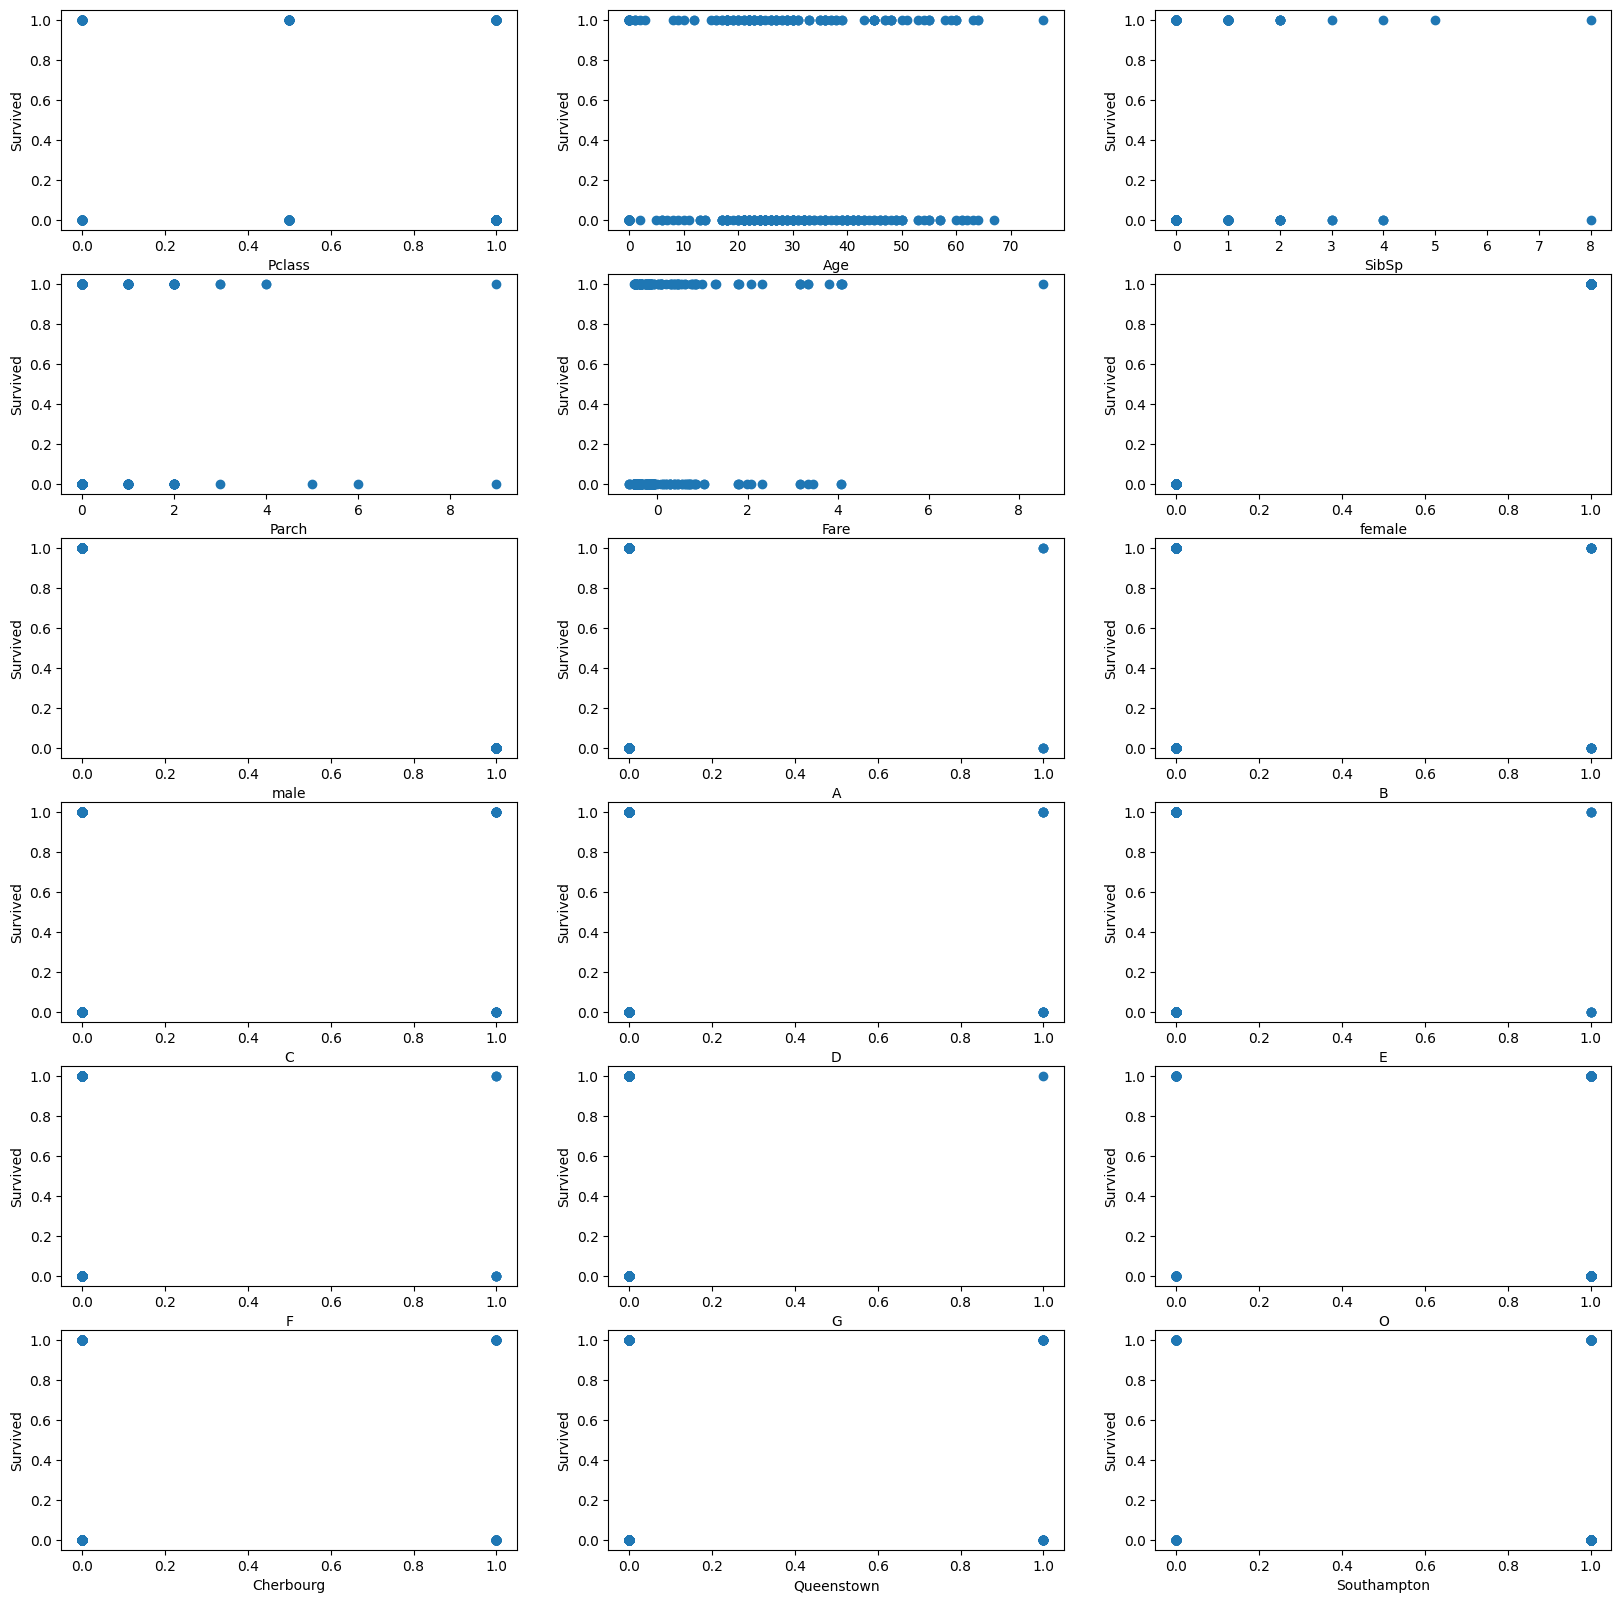

In [189]:
X = np.array(data.drop(['Survived','PassengerId'], axis=1))
y = np.array(data['Survived'])

print(X)
print(y)
print(X.shape)
print(y.shape)

plt.figure(figsize=(20,20))
plt.subplot(6,3,1)
plt.scatter(X[:,0],y)
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.subplot(6,3,2)
plt.scatter(X[:,1],y)
plt.xlabel('Age')
plt.ylabel('Survived')
plt.subplot(6,3,3)
plt.scatter(X[:,2],y)
plt.xlabel('SibSp')
plt.ylabel('Survived')
plt.subplot(6,3,4)
plt.scatter(X[:,3],y)
plt.xlabel('Parch')
plt.ylabel('Survived')
plt.subplot(6,3,5)
plt.scatter(X[:,4],y)
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.subplot(6,3,6)
plt.scatter(X[:,5],y)
plt.xlabel('female')
plt.ylabel('Survived')
plt.subplot(6,3,7)
plt.scatter(X[:,6],y)
plt.xlabel('male')
plt.ylabel('Survived')
plt.subplot(6,3,8)
plt.scatter(X[:,7],y)
plt.xlabel('A')
plt.ylabel('Survived')
plt.subplot(6,3,9)
plt.scatter(X[:,8],y)
plt.xlabel('B')
plt.ylabel('Survived')
plt.subplot(6,3,10)
plt.scatter(X[:,9],y)
plt.xlabel('C')
plt.ylabel('Survived')
plt.subplot(6,3,11)
plt.scatter(X[:,10],y)
plt.xlabel('D')
plt.ylabel('Survived')
plt.subplot(6,3,12)
plt.scatter(X[:,11],y)
plt.xlabel('E')
plt.ylabel('Survived')
plt.subplot(6,3,13)
plt.scatter(X[:,12],y)
plt.xlabel('F')
plt.ylabel('Survived')
plt.subplot(6,3,14)
plt.scatter(X[:,13],y)
plt.xlabel('G')
plt.ylabel('Survived')
plt.subplot(6,3,15)
plt.scatter(X[:,14],y)
plt.xlabel('O')
plt.ylabel('Survived')
plt.subplot(6,3,16)
plt.scatter(X[:,15],y)
plt.xlabel('Cherbourg')
plt.ylabel('Survived')
plt.subplot(6,3,17)
plt.scatter(X[:,16],y)
plt.xlabel('Queenstown')
plt.ylabel('Survived')
plt.subplot(6,3,18)
plt.scatter(X[:,17],y)
plt.xlabel('Southampton')
plt.ylabel('Survived')

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(334, 18)
(334,)
(84, 18)
(84,)


# Algorithm
$
h_\theta = \frac{1}{1+e^{-(\theta_0+\theta_1X)}}
$

# Model

In [463]:
class LogisticReg:
    # Hyperparametrers
    def __init__(self, lr = 0.01, epochs = 100, treshold = .5, regularization = None, alpha = 0):
        self.lr = lr
        self.epochs = epochs
        self.treshold = treshold
        self.regularization = regularization
        self.alpha = alpha
        self.weights = None
        self.bias = None

    def fit(self, X, y):

        # Matrix dimentions
        # m = rows
        # n = columns
        m, n = X.shape

        self.weights = np.random.rand(n, 1)
        self.bias = np.random.rand(1)

        # We need to reshape y to be a column vector
        y = y.reshape(m, 1)

        losses = list()
        b_list = list()
        w_list = list()

        # Gradient Descent
        for epoch in range(self.epochs):
            # Calculate Prediction
            y_hat = self.sigmoid(X)

            # Get loss - L - J
            loss = self.bce(y, y_hat)          # Mean Square Error
            losses.append(loss)

            # Calculate gradient
            dw = (-1 / m) * np.dot(X.T, (y - y_hat))
            db = (-1 / m) * np.sum((y - y_hat))
            
            # upgrade parames
            self.weights = self.weights - self.lr * dw + self.regularizate()
            self.bias = self.bias - self.lr * db + self.regularizate()

            w_list.append(self.weights)
            b_list.append(self.bias)

            print(f"epoch: {epoch}, loss: {loss}, w: {self.weights}, b: {self.bias}")

        return self.weights, self.bias, losses, w_list, b_list
    
    def linear(self, X):
        return np.dot(X, self.weights) + self.bias
    
    def sigmoid(self, X):
        return 1 / ( 1 + np.exp(-(self.linear(X))) )

    def predict(self, X):
        return (self.sigmoid(X) >= self.treshold).astype(int)
    
    def mse(self, y, y_hat):
        return np.mean((y - y_hat)**2)

    def bce(self, y, y_hat):
        # return - np.mean(y*np.log(y_hat+1e-9) + (1-y)*np.log(1-y_hat+1e-9))
        return - np.mean(np.dot(y.T,np.log(y_hat+1e-9)) + (1-y).T.dot(np.log(1-y_hat+1e-9)))
    
    def regularizate(self):
        if (self.regularization == None):
            return 0
        elif (self.regularization == "L1"):
            return self.alpha * np.sum(np.abs(self.weights))
        elif (self.regularization == "L2"):
            return self.alpha * np.sum(self.weights**2)
        else:
            return 0

In [464]:
np.random.seed(42)
model = LogisticReg(lr=0.001,epochs=100, regularization="L1", alpha=0.0001)
w, b, losses, w_list, b_list = model.fit(X_train, y_train)

epoch: 0, loss: 3259.6878967147, w: [[0.37497733]
 [0.93721337]
 [0.73258112]
 [0.59929412]
 [0.15692906]
 [0.15684692]
 [0.05830991]
 [0.86701324]
 [0.60193415]
 [0.70887674]
 [0.0214164 ]
 [0.97073832]
 [0.83327717]
 [0.21318226]
 [0.18216374]
 [0.18410728]
 [0.30504563]
 [0.52517206]], b: [0.43218045]
epoch: 1, loss: 3253.0834045149545, w: [[0.37541431]
 [0.92371227]
 [0.73316811]
 [0.59992957]
 [0.15783932]
 [0.15769914]
 [0.05853599]
 [0.86785016]
 [0.6027531 ]
 [0.70968073]
 [0.02224814]
 [0.9715666 ]
 [0.83411152]
 [0.21402522]
 [0.18250229]
 [0.18480986]
 [0.30584882]
 [0.52558749]], b: [0.43241566]
epoch: 2, loss: 3246.006689633868, w: [[0.37585107]
 [0.91021098]
 [0.73375491]
 [0.60056485]
 [0.15874943]
 [0.15855115]
 [0.05876185]
 [0.86868691]
 [0.60357188]
 [0.71048453]
 [0.02307968]
 [0.97239471]
 [0.83494569]
 [0.21486801]
 [0.1828406 ]
 [0.18551225]
 [0.30665181]
 [0.52600272]], b: [0.43265063]
epoch: 3, loss: 3238.422621335893, w: [[0.37628761]
 [0.89670953]
 [0.7343415

# Results

Text(0, 0.5, 'loss')

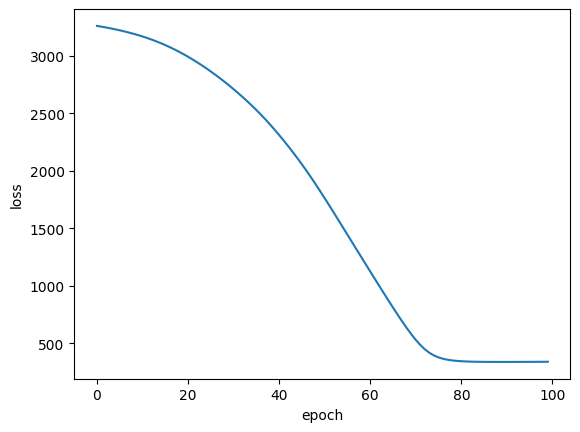

In [465]:
#plt.subplot(1,3,1)
plt.plot(np.arange(len(losses)), losses)
plt.xlabel('epoch')
plt.ylabel('loss')


In [466]:
y_predicted = model.predict(X_test)
print(y_predicted)

[[1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]]


Text(0, 0.5, 'y')

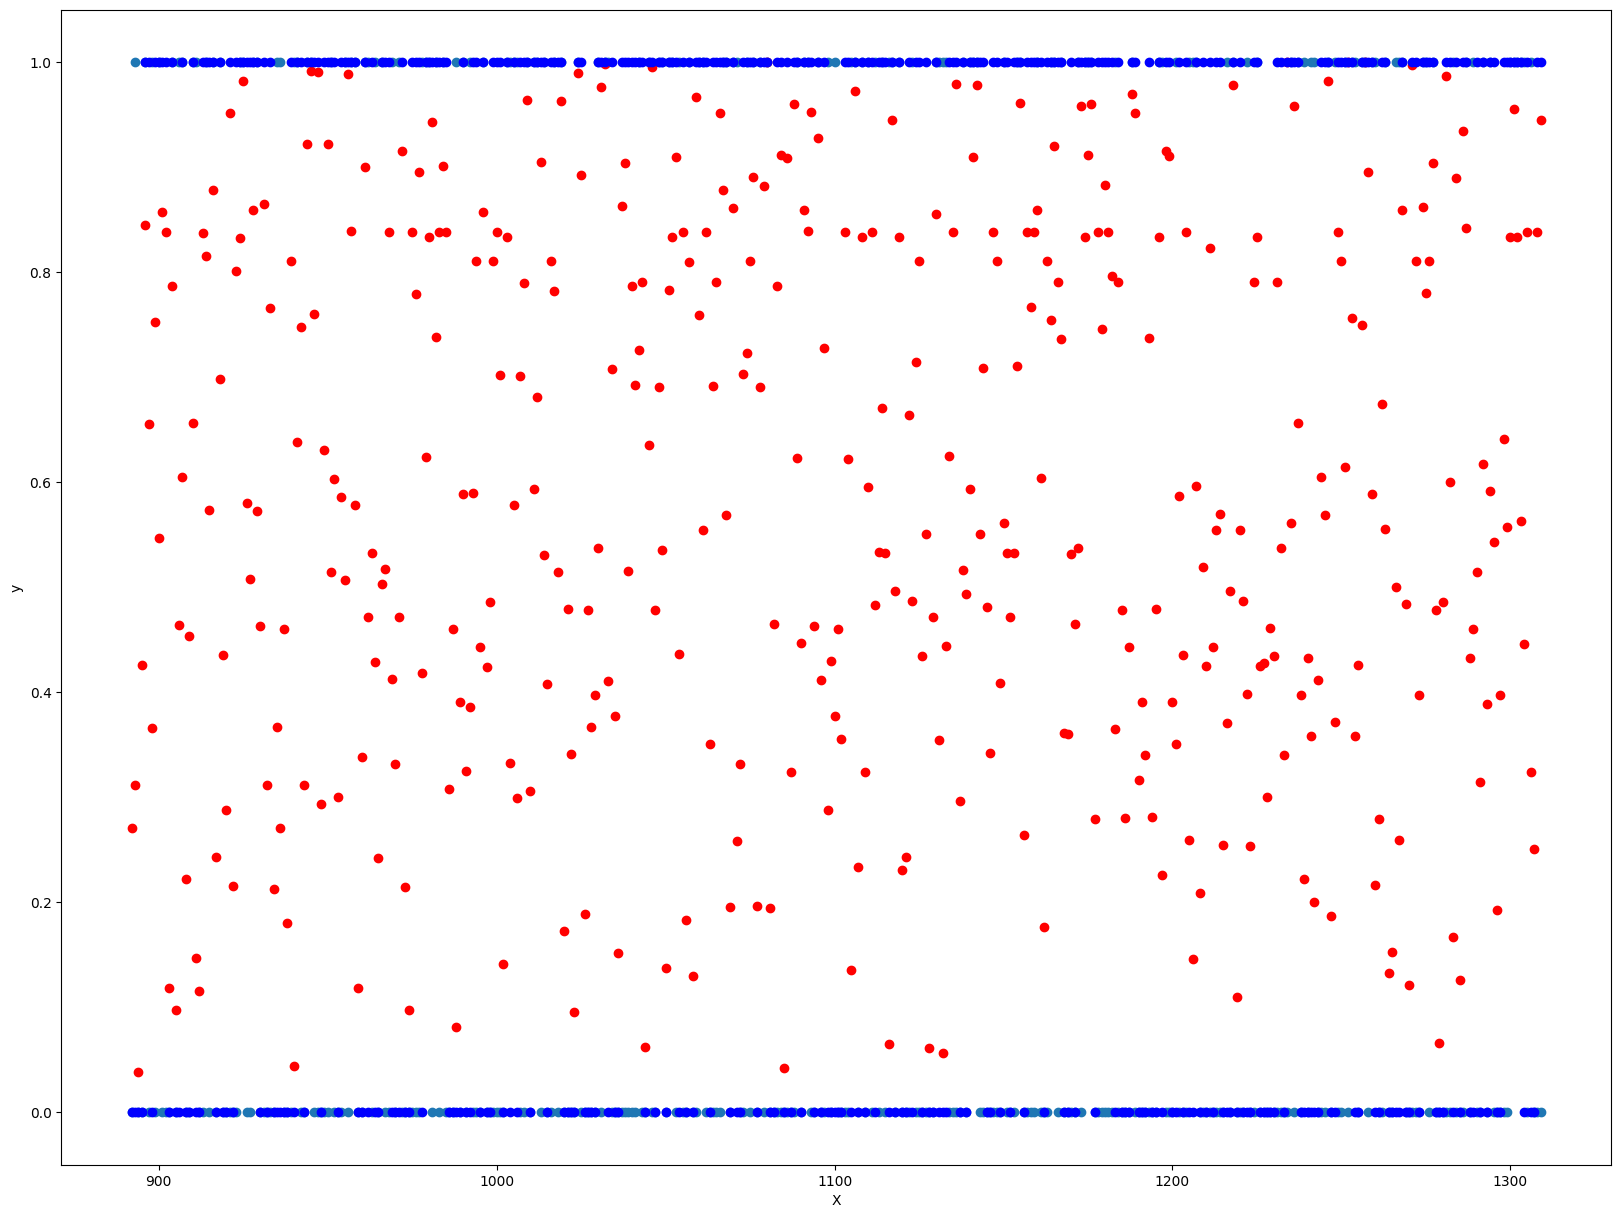

In [477]:
plt.figure(figsize=(20,15))
plt.scatter(data['PassengerId'], y)
plt.scatter(data['PassengerId'], model.sigmoid(X),c='r')
plt.scatter(data['PassengerId'], model.predict(X),c='b')
plt.xlabel('X')
plt.ylabel('y')

In [478]:
print(f"Loss: {losses[-1]}, weight: {w}, bias: {b}")

Loss: 339.5083575256882, weight: [[ 0.42275678]
 [-0.07206486]
 [ 0.79282273]
 [ 0.6636889 ]
 [ 0.2474159 ]
 [ 0.24411601]
 [ 0.08667555]
 [ 0.94995013]
 [ 0.68337869]
 [ 0.78939043]
 [ 0.10402167]
 [ 1.05283004]
 [ 0.91581311]
 [ 0.29651159]
 [ 0.22226274]
 [ 0.25605619]
 [ 0.38503276]
 [ 0.57219103]], bias: [0.46452769]


# Some practice (Extra stuff)

In [467]:
#equis = np.array([-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10])
equis = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
equis = equis.reshape(-1,1)
ye = np.array([0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,1,1,1,1,1])
np.random.seed(42)
modelo = LogisticReg(lr=0.01,epochs=5000, regularization="L1", alpha=0.00000000001)
we, be, lossese, we_list, be_list = modelo.fit(equis, ye)

epoch: 0, loss: 30.10088515595246, w: [[0.34978412]], b: [0.946223]
epoch: 1, loss: 28.839401967088826, w: [[0.3252134]], b: [0.94176412]
epoch: 2, loss: 27.59769255266308, w: [[0.30086738]], b: [0.93734216]
epoch: 3, loss: 26.37975091111182, w: [[0.27679566]], b: [0.93296247]
epoch: 4, loss: 25.190512174702985, w: [[0.25306086]], b: [0.92863143]
epoch: 5, loss: 24.03604657351964, w: [[0.22974184]], b: [0.92435665]
epoch: 6, loss: 22.923747567344225, w: [[0.20693729]], b: [0.92014715]
epoch: 7, loss: 21.862466801948283, w: [[0.1847693]], b: [0.91601353]
epoch: 8, loss: 20.86251280964959, w: [[0.16338596]], b: [0.91196799]
epoch: 9, loss: 19.93538799275872, w: [[0.14296157]], b: [0.90802415]
epoch: 10, loss: 19.09310904317285, w: [[0.12369228]], b: [0.9041966]
epoch: 11, loss: 18.34698246626495, w: [[0.10578509]], b: [0.90049984]
epoch: 12, loss: 17.705848502954566, w: [[0.08943878]], b: [0.89694686]
epoch: 13, loss: 17.174090947167244, w: [[0.07481832]], b: [0.89354732]
epoch: 14, loss

Text(0, 0.5, 'ye')

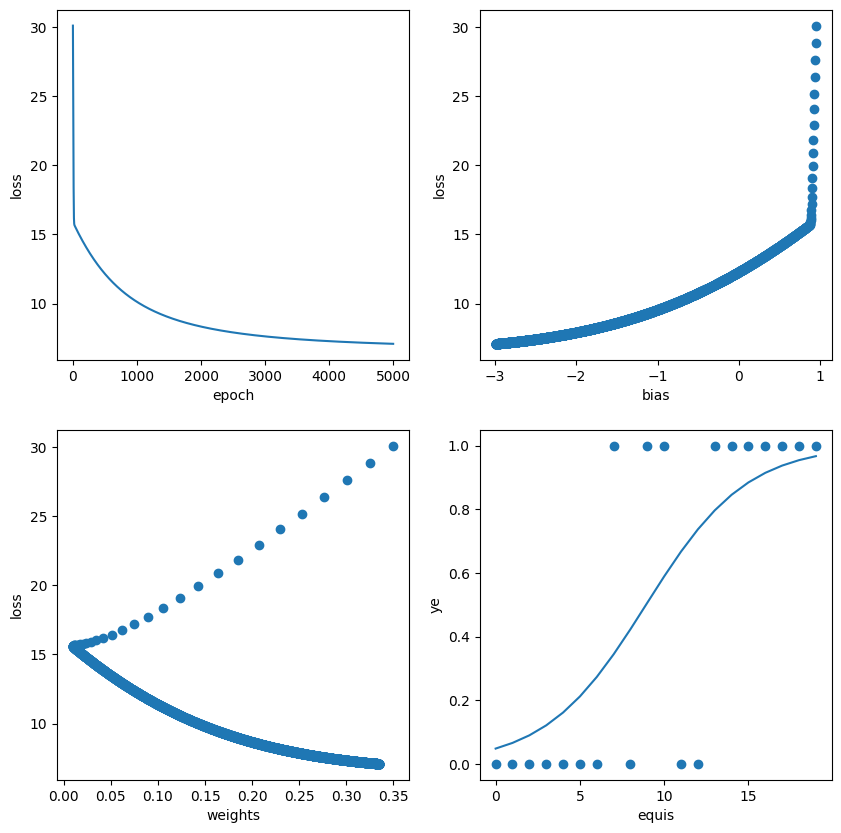

In [469]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(np.arange(len(lossese)), lossese)
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(2,2,2)
plt.scatter(be_list, lossese)
plt.xlabel('bias')
plt.ylabel('loss')

plt.subplot(2,2,3)
plt.scatter(we_list, lossese)
plt.xlabel('weights')
plt.ylabel('loss')

plt.subplot(2,2,4)
plt.scatter(equis, ye)
plt.plot(equis, modelo.sigmoid(equis))
plt.xlabel('equis')
plt.ylabel('ye')